In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd

path = "/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(path)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dataset Overview**

In [50]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

**Check Missing Values**

In [51]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Churn Distribution**

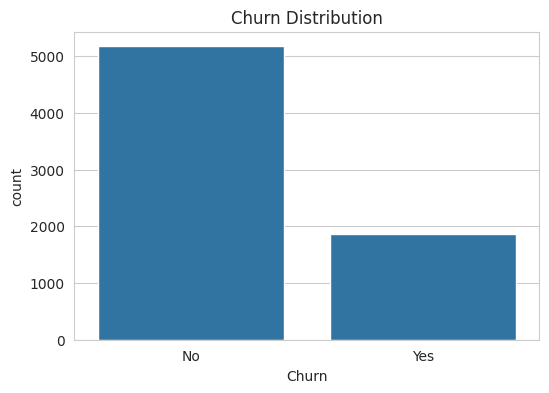

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

In [53]:
df["Churn"].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.463013
Yes,26.536987


**Numerical Feature Distribution**

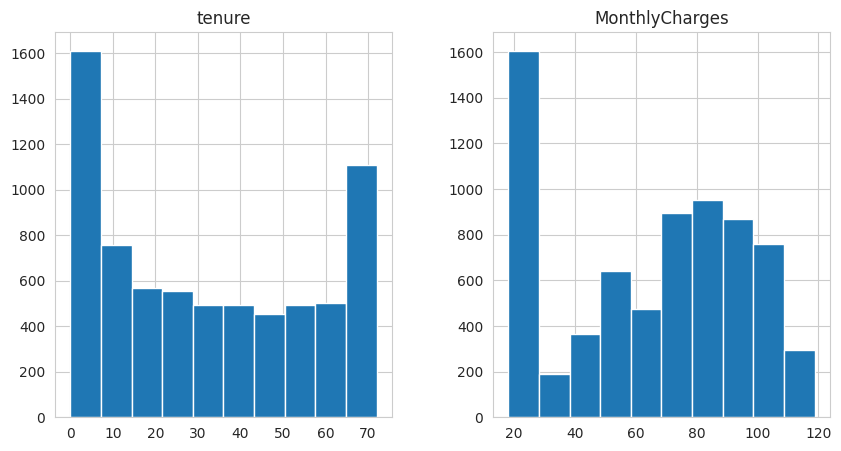

In [54]:
df[["tenure", "MonthlyCharges", "TotalCharges"]].hist(figsize=(10,5))
plt.show()

**Tenure vs Churn**

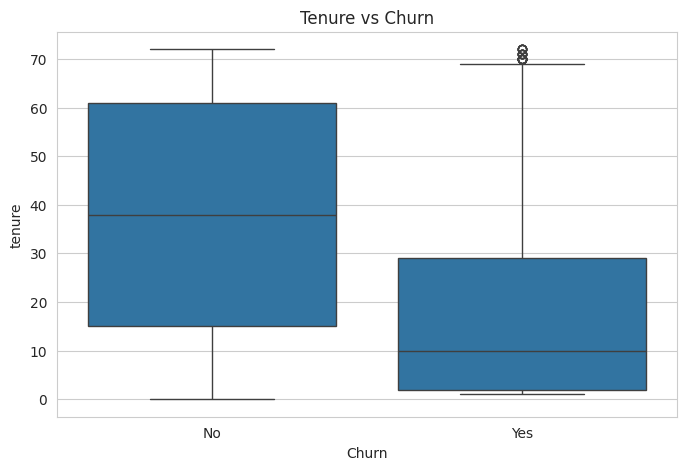

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

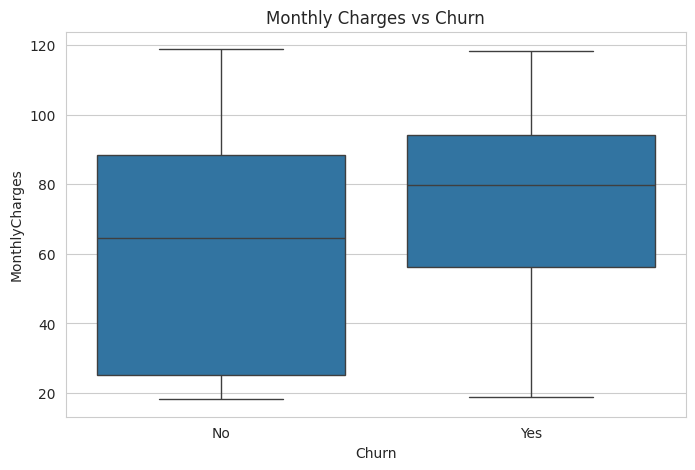

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

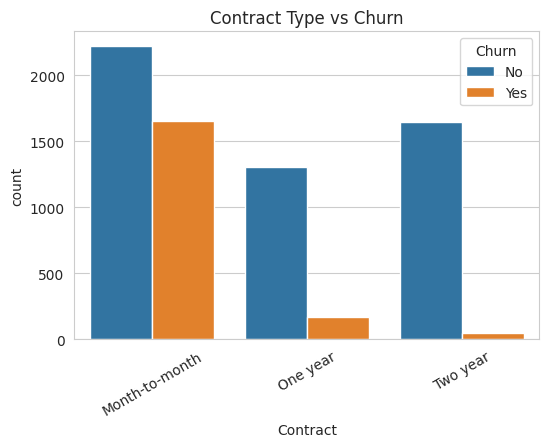

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=30)
plt.show()

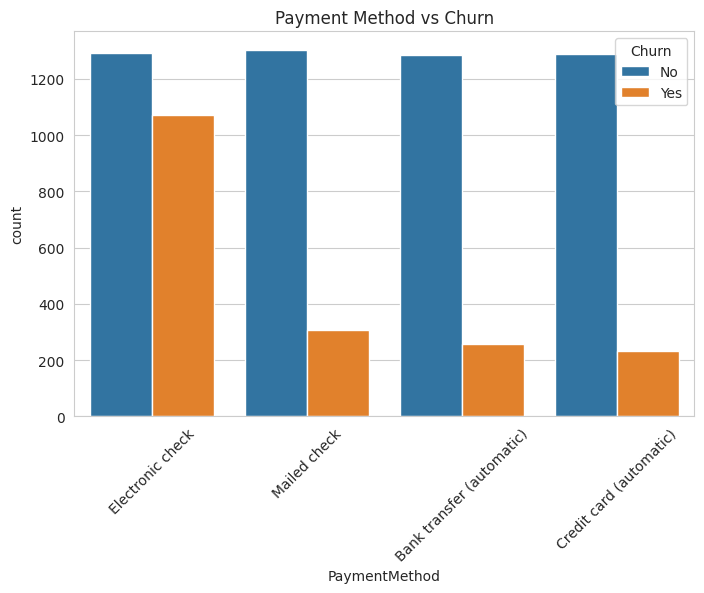

In [58]:
plt.figure(figsize=(8,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()

**Data Cleaning**

In [59]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Convert TotalCharge**

In [60]:
df["TotalCharges"] = pd.to_numeric(
    df["TotalCharges"],
    errors="coerce"
)

df["TotalCharges"].dtype

dtype('float64')

In [61]:
df.columns = df.columns.str.strip()

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
print(df["Churn"].unique())

['No' 'Yes']


**Encode Target Variable**

In [63]:
df["Churn"] = df["Churn"].map({
    "No": 0,
    "Yes": 1
})

df["Churn"].value_counts()

,count
Churn,
0,5174
1,1869


In [64]:
print("Churn Percentage:", df["Churn"].mean() * 100)

Churn Percentage: 26.536987079369588


**Drop customerID**

In [65]:
df.drop("customerID", axis=1, inplace=True)

**Apply One-Hot Encoding**

In [66]:
df = pd.get_dummies(df, drop_first=True)

df.shape

(7043, 31)

In [67]:
# Convert again safely
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Final verification
print("Total missing in df:", df.isna().sum().sum())

Total missing in df: 0


/tmp/ipython-input-2426988655.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [68]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [69]:
print("Total missing:", df.isna().sum().sum())

Total missing: 0


**Separate Features & Target**

In [70]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

**Train-Test Split**

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5634, 30)
Test shape: (1409, 30)


**Feature Scaling**

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train Logistic Regression**

In [73]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

**Model Evaluation**

In [74]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8069552874378992


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



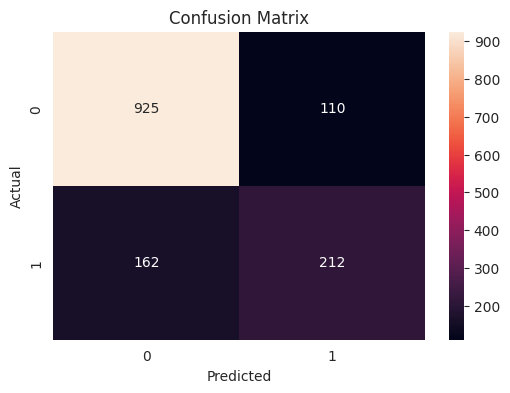

In [76]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [77]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test_scaled)[:,1]

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.8415846443979436


**Install LightGBM**

In [78]:
!pip install lightgbm

In [79]:
import lightgbm as lgb

**Understand Class Imbalance**

In [80]:
print(y_train.value_counts(normalize=True))

Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64


## Class Imbalance Analysis

The dataset shows imbalance with approximately 26% churn cases.
To improve churn detection, class weighting will be applied.

**Train LightGBM with Class Balancing**


In [81]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    class_weight="balanced",
    random_state=42
)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:,1]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


## LightGBM Model Training

LightGBM was trained using class balancing to improve churn prediction performance.

**Evaluate Model (Focus on ROC-AUC)**

In [82]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lgb))
print(classification_report(y_test, y_pred_lgb))

Accuracy: 0.7615330021291696
ROC-AUC: 0.8332726239375856
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.74      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409



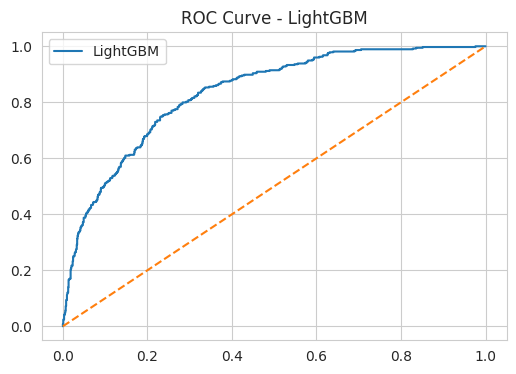

In [83]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob_lgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="LightGBM")
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title("ROC Curve - LightGBM")
plt.show()

**Feature Importance**

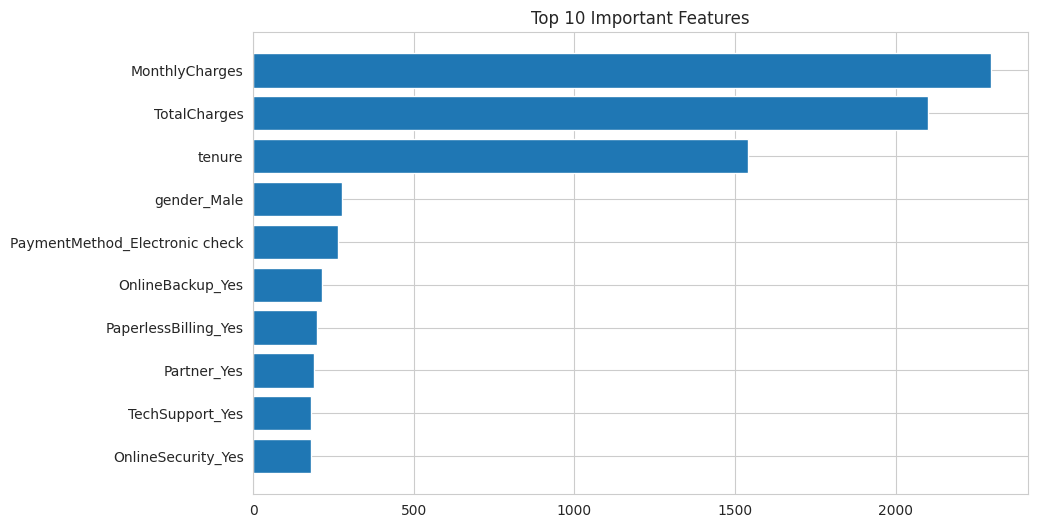

In [84]:
import pandas as pd

importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance["Feature"][:10], importance["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features")
plt.show()

## Feature Importance Analysis

Contract type, tenure, and monthly charges were among the strongest predictors of churn.

**Compare With Logistic Regression**

In [85]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "LightGBM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_lgb)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]),
        roc_auc_score(y_test, y_prob_lgb)
    ]
})

results

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.806955,0.841585
1,LightGBM,0.761533,0.833273


**Hyperparameter Tuning (GridSearch)**

In [86]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Calculate scale_pos_weight for handling class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

param_grid = {
    "n_estimators": [200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "num_leaves": [20, 31, 50]
}

grid = GridSearchCV(
    lgb.LGBMClassifier(
        scale_pos_weight=scale_pos_weight,
        random_state=42
    ),
    param_grid,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

## Hyperparameter Tuning

LightGBM hyperparameters were optimized using GridSearchCV with ROC-AUC as the scoring metric.

**Evaluate Tuned Model**

In [87]:
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score

print("ROC-AUC:", roc_auc_score(y_test, y_prob_best))
print(classification_report(y_test, y_pred_best))

ROC-AUC: 0.8413624738432923
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



**Decision Threshold Optimization**

Plot Precision–Recall Curve

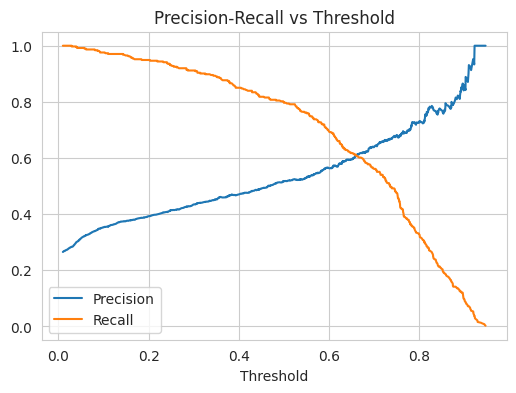

In [88]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_best)

plt.figure(figsize=(6,4))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.show()

## Threshold Optimization

The decision threshold was analyzed to balance precision and recall according to business priorities.

**Choose Business-Oriented Threshold**

In [89]:
custom_threshold = 0.4

y_pred_custom = (y_prob_best >= custom_threshold).astype(int)

print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.92      0.65      0.77      1035
           1       0.47      0.85      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.71      0.72      1409



A lower threshold was selected to improve churn recall while maintaining acceptable precision.

**Update Comparison Table**

In [90]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "LightGBM Tuned"],
    "ROC-AUC": [
        roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]),
        roc_auc_score(y_test, y_prob_best)
    ]
})

comparison

,Model,ROC-AUC
0,Logistic Regression,0.841585
1,LightGBM Tuned,0.841362


In [91]:
!pip install shap

In [92]:
import shap

In [93]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


## SHAP Explainability Setup

SHAP was used to interpret the tuned LightGBM model and understand feature contributions to churn predictions.

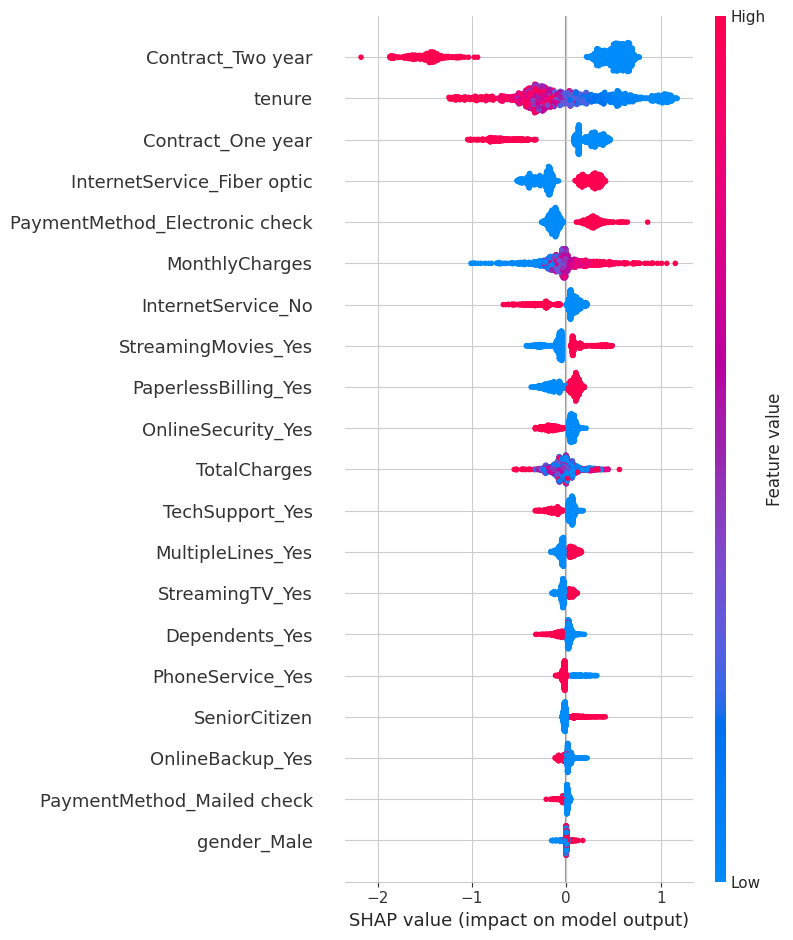

In [94]:
shap.summary_plot(shap_values, X_test)

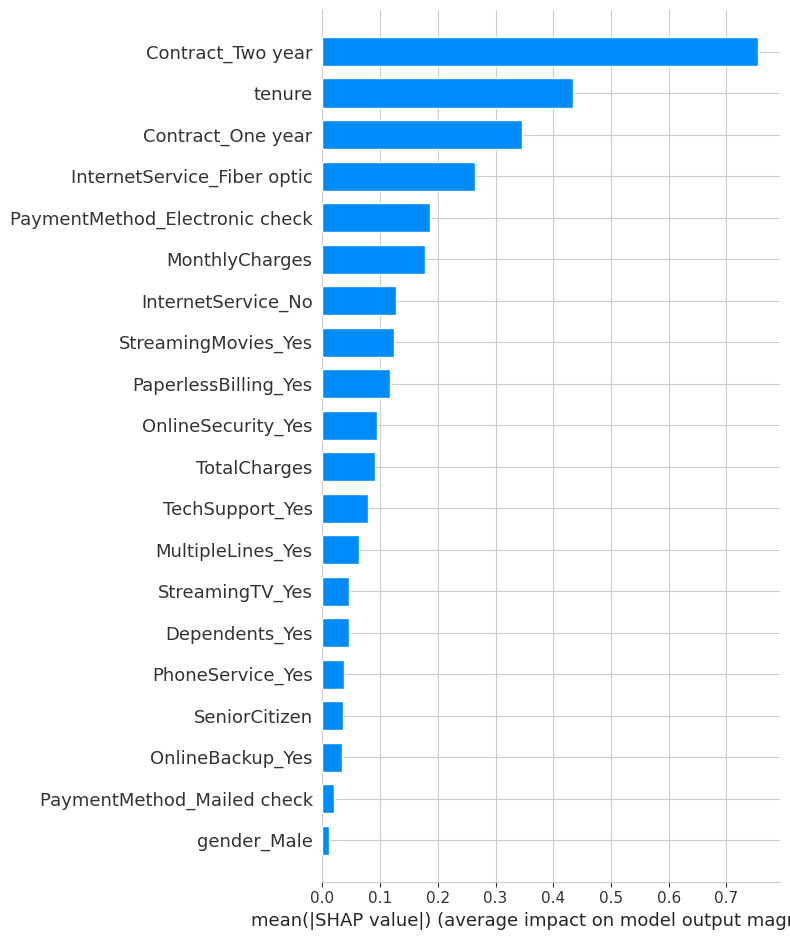

In [95]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [99]:
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

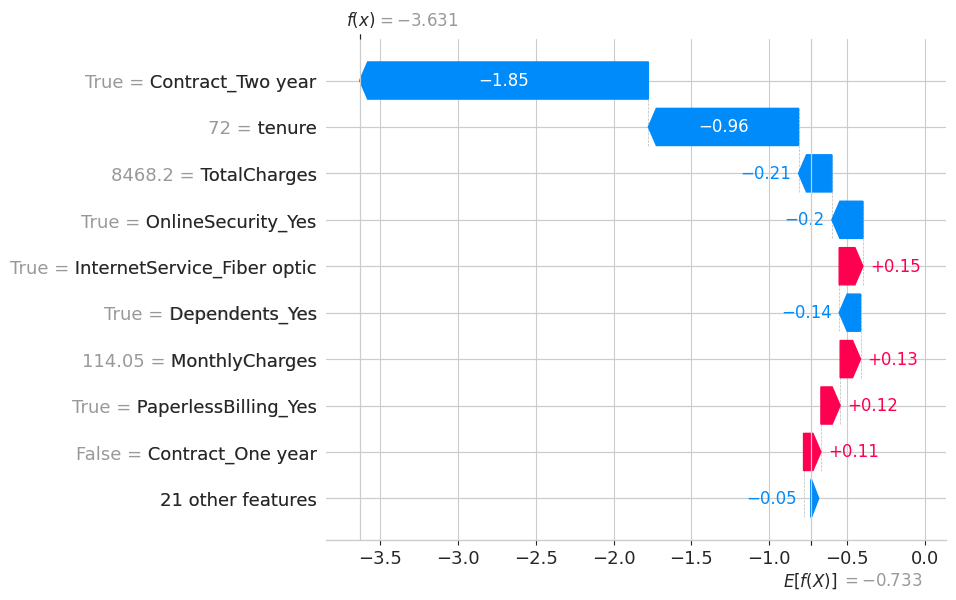

In [100]:
shap.plots.waterfall(shap_values[0])

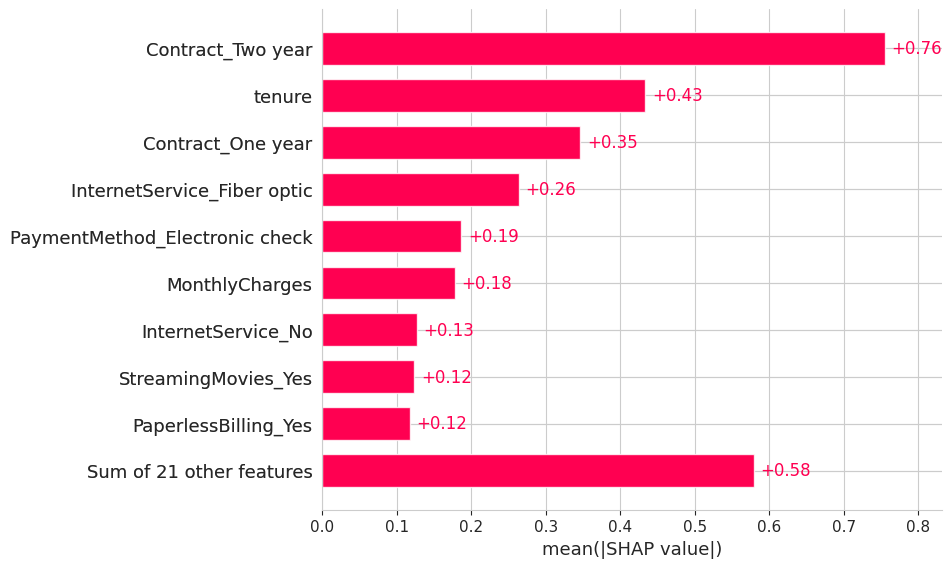

In [101]:
shap.plots.bar(shap_values)

## Individual Prediction Explanation

A SHAP force plot was used to explain how specific features contributed to a customer's churn probability.

## Key Churn Drivers Identified

- Month-to-month contracts increase churn probability
- Lower tenure strongly increases churn risk
- Higher monthly charges contribute to churn
- Lack of online security or tech support increases churn likelihood